In [14]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [17]:
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
clouds=[]
wind_speed=[]
country=[]
date=[]

record_counter=1
set_counter=1



In [18]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [19]:
for city in cities:
    try:
        query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)
        weather_json = response.json()
        city_name.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json["wind"]["speed"])

        print(f"Processing Record {record_counter} of set {set_counter} | {city}")
    
    except KeyError:
        print(f"City not found. Skipping {city}...")
    
    record_counter = record_counter + 1
    if record_counter == 51:
        record_counter = 1
        set_counter = set_counter + 1
        

print("Data Retrieval Complete")

        
        

Processing Record 1 of set 1 | rio gallegos
Processing Record 2 of set 1 | busselton
Processing Record 3 of set 1 | cape town
Processing Record 4 of set 1 | shelburne
Processing Record 5 of set 1 | rikitea
Processing Record 6 of set 1 | leshukonskoye
City not found. Skipping guichicovi...
Processing Record 8 of set 1 | jamestown
Processing Record 9 of set 1 | west bay
Processing Record 10 of set 1 | dikson
Processing Record 11 of set 1 | turukhansk
Processing Record 12 of set 1 | kaitangata
Processing Record 13 of set 1 | finschhafen
Processing Record 14 of set 1 | coruripe
Processing Record 15 of set 1 | saint george
Processing Record 16 of set 1 | arman
Processing Record 17 of set 1 | norman wells
Processing Record 18 of set 1 | hoima
Processing Record 19 of set 1 | bud
Processing Record 20 of set 1 | sydney
Processing Record 21 of set 1 | hilo
Processing Record 22 of set 1 | nhulunbuy
Processing Record 23 of set 1 | hobart
Processing Record 24 of set 1 | homer
Processing Record 25 o

Processing Record 3 of set 5 | east london
Processing Record 4 of set 5 | luderitz
Processing Record 5 of set 5 | tsiroanomandidy
Processing Record 6 of set 5 | ribeira grande
Processing Record 7 of set 5 | matay
Processing Record 8 of set 5 | magole
Processing Record 9 of set 5 | cockburn town
Processing Record 10 of set 5 | port hueneme
Processing Record 11 of set 5 | pangnirtung
Processing Record 12 of set 5 | ravar
Processing Record 13 of set 5 | tautira
Processing Record 14 of set 5 | madimba
Processing Record 15 of set 5 | guilin
Processing Record 16 of set 5 | plettenberg bay
Processing Record 17 of set 5 | faanui
Processing Record 18 of set 5 | nokaneng
Processing Record 19 of set 5 | fortuna
Processing Record 20 of set 5 | tilichiki
Processing Record 21 of set 5 | dunedin
Processing Record 22 of set 5 | tiznit
Processing Record 23 of set 5 | sioux lookout
Processing Record 24 of set 5 | sao joao
City not found. Skipping hunza...
Processing Record 26 of set 5 | isangel
Processi

Processing Record 5 of set 9 | tsotsin-yurt
Processing Record 6 of set 9 | vao
Processing Record 7 of set 9 | kedgwick
Processing Record 8 of set 9 | atlantis
Processing Record 9 of set 9 | bilibino
City not found. Skipping malwan...
Processing Record 11 of set 9 | kupang
Processing Record 12 of set 9 | tubuala
Processing Record 13 of set 9 | shu
Processing Record 14 of set 9 | campbell river
Processing Record 15 of set 9 | sobolevo
Processing Record 16 of set 9 | boa vista
Processing Record 17 of set 9 | fort-shevchenko
Processing Record 18 of set 9 | mariental
Processing Record 19 of set 9 | ostrovnoy
Processing Record 20 of set 9 | mansa
Processing Record 21 of set 9 | curup
Processing Record 22 of set 9 | key west
Processing Record 23 of set 9 | neyshabur
Processing Record 24 of set 9 | longyearbyen
Processing Record 25 of set 9 | ploemeur
Processing Record 26 of set 9 | puerto leguizamo
Processing Record 27 of set 9 | udachnyy
Processing Record 28 of set 9 | colesberg
Processing R

In [24]:
weather_dictionary={
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind_speed,
    "Country": country,
    "Date": date
}
                        
weather_df = pd.DataFrame(weather_dictionary)
weather_df.drop_duplicates("City")

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Río Gallegos,-51.6226,-69.2181,42.85,87,75,8.05,AR,1659548904
1,Busselton,-33.6500,115.3333,53.46,75,88,16.93,AU,1659548905
2,Cape Town,-33.9258,18.4232,55.90,79,40,9.22,ZA,1659548867
3,Shelburne,44.0787,-80.2041,81.75,54,100,19.42,CA,1659548710
4,Rikitea,-23.1203,-134.9692,72.05,69,79,16.60,PF,1659548728
...,...,...,...,...,...,...,...,...,...
549,Ürümqi,43.8010,87.6005,81.55,28,0,2.24,CN,1659548882
550,Bukama,-9.2000,25.8500,78.82,29,0,4.16,CD,1659549080
551,Cabedelo,-6.9811,-34.8339,79.47,73,33,6.96,BR,1659549081
552,Yumbel,-37.0833,-72.5667,46.63,50,29,1.95,CL,1659549081


In [25]:
weather_df.count()

City          554
Latitude      554
Longitude     554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

-Export city list to csv

In [26]:
weather_df.to_csv("C:/Users/krcon/OneDrive/Desktop/Class Master Folder/Challenge6APIs/citiescsv.csv", index=False, header=True)

In [27]:
weather_data=pd.DataFrame(weather_dictionary)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Río Gallegos,-51.6226,-69.2181,42.85,87,75,8.05,AR,1659548904
1,Busselton,-33.6500,115.3333,53.46,75,88,16.93,AU,1659548905
2,Cape Town,-33.9258,18.4232,55.90,79,40,9.22,ZA,1659548867
3,Shelburne,44.0787,-80.2041,81.75,54,100,19.42,CA,1659548710
4,Rikitea,-23.1203,-134.9692,72.05,69,79,16.60,PF,1659548728


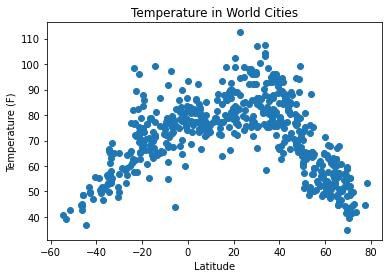

In [28]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

In [29]:
# Temperature in World cities in comparison to the equator (0 Latitude)

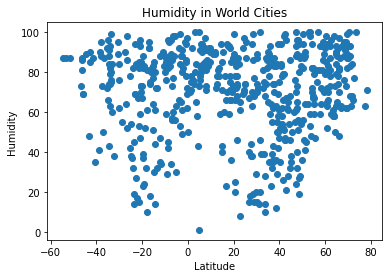

In [30]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

In [31]:
# Humidity in World cities in comparison to the equator (0 Latitude)

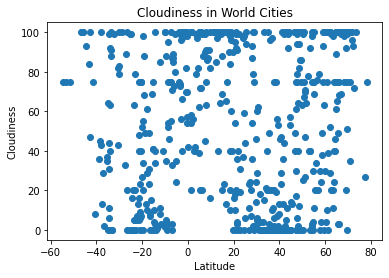

In [32]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

In [33]:
# Cloudiness in World cities in comparison to the equator (0 Latitude)

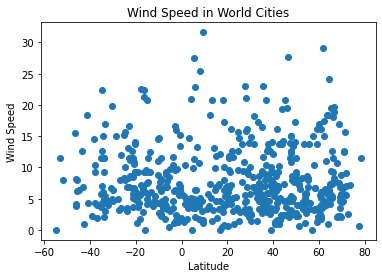

In [34]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid=True

plt.show()

In [35]:
#Wind Speed (MPH) in World cities in comparison to the equator (0 Latitude)

In [39]:
weather_data.dtypes

City           object
Latitude      float64
Longitude     float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [40]:
weather_data['Humidity'].astype(float)
weather_data['Cloudiness'].astype(float)
weather_data['Date'].astype(float)


0      1.659549e+09
1      1.659549e+09
2      1.659549e+09
3      1.659549e+09
4      1.659549e+09
           ...     
549    1.659549e+09
550    1.659549e+09
551    1.659549e+09
552    1.659549e+09
553    1.659549e+09
Name: Date, Length: 554, dtype: float64

In [44]:
north_df=weather_data.loc[(weather_data["Latitude"]).astype(float)>0, :]
south_df=weather_data.loc[(weather_data["Latitude"]).astype(float)<0, :]    

In [ ]:
x_values=south_df["Latitude"]
y_values=south_df["Max Temp"]
regress_values= x_values * slope + intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression for Southern Hemisphere")
print(f"r-value: {rvalue}")
print(f"The data shows there is a positive correlation between latitude and max temperatures")

plt.show()




r-value: -0.6596711680017948
The data shows there is a positive correlation between latitude and max temperatures


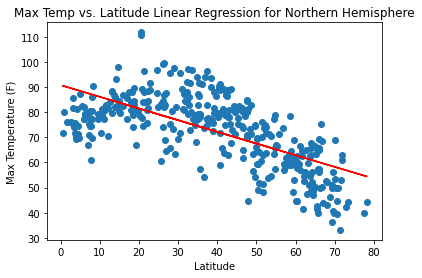

In [55]:
x_values=north_df["Latitude"]
y_values=north_df["Max Temp"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression for Northern Hemisphere")
print(f"r-value: {rvalue}")
print(f"The data shows there is a positive correlation between latitude and max temperatures")

plt.show()

r-value: 0.0068258993475506305
The data shows there is no correlation between latitude and Humidity


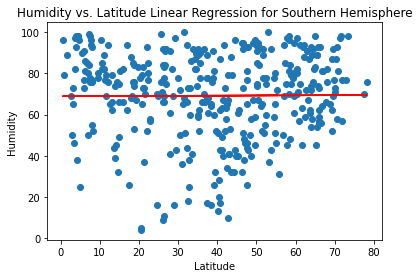

In [53]:
x_values=north_df["Latitude"]
y_values=north_df["Humidity"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude Linear Regression for Northern Hemisphere")
print(f"r-value: {rvalue}")
print(f"The data shows there is no correlation between latitude and Humidity")

plt.show()

r-value: -0.06569026770713882
The data shows there is no correlation between latitude and Humidity


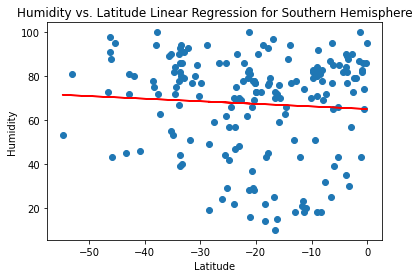

In [54]:
x_values=south_df["Latitude"]
y_values=south_df["Humidity"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude Linear Regression for Southern Hemisphere")
print(f"r-value: {rvalue}")
print(f"The data shows there is no correlation between latitude and Humidity")

plt.show()

r-value: -0.028952000713871683



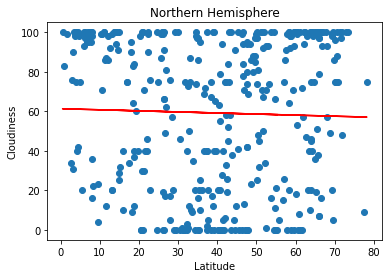

In [59]:
x_values=north_df["Latitude"]
y_values=north_df["Cloudiness"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere")
print(f"r-value: {rvalue}")
print(f"")

plt.show()

r-value: 0.10939874848965749



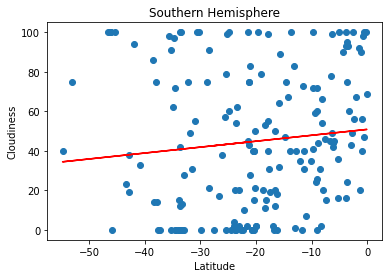

In [60]:
x_values=south_df["Latitude"]
y_values=south_df["Cloudiness"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere")
print(f"r-value: {rvalue}")
print(f"")

plt.show()

r-value: -0.04850023889960579



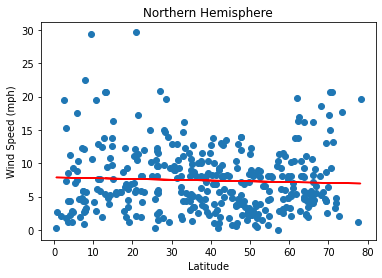

In [62]:
x_values=north_df["Latitude"]
y_values=north_df["Wind Speed"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere")
print(f"r-value: {rvalue}")
print(f"")

plt.show()

In [ ]:
x_values=south_df["Latitude"]
y_values=south_df["Wind Speed"]
regress_values= x_values*slope+intercept


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere")
print(f"r-value: {rvalue}")
print(f"")

plt.show()